# P5_Optimisez la gestion des données d'une boutique avec Python

## - Importation des librairies

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Partie 1 - Importation et nettoyage des données

### 1.1)  Fichier 'erp'  qui contient :
- Les références produit  
- Prix de vente  
- Etat du stock

**1.1.1). Lecture du fichier**
- Charger le fichier.  
- Voir les 5 premières lignes du dataFrame.   
- Voir les statistiques diverses (moyenne, maximum, minimum, etc.) du dataFrame .   
- Obtenir les détails essentiels sur notre dataFrame.  
- Obtenir le nombre de lignes et le nombre de colonnes. 

In [41]:
# Charger le fichier 
erp = pd.read_csv("D:\Open_work\P5\p5_work\csv\erp.csv", sep=';', decimal=',')

In [42]:
# Voir les 5 premières lignes du dataFrame
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [43]:
# Obtenir les détails essentiels sur notre dataFrame
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [44]:
# Voir les statistiques diverses (moyenne, maximum, minimum, etc.) du dataFrame 
erp.describe(include="all")

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [45]:
# Obtenir le nombre de lignes et le nombre de colonnes
erp.shape

(825, 5)

**1.1.2). Nettoyage du fichier**
- Changer les noms des colonnes si nécessaire.  
- Vérification des doublons.  
- Vérification des valeurs manquantes.  
- Vérification des valeurs aberrantes.


In [46]:
# Vérification des doublons
erp.duplicated(['product_id']).sum()

0

In [47]:
# Vérification des valeurs manquantes
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

### 1.2.  Fichier 'web' qui contient :
Les informations des produits commercialisés en ligne  
(nom, description, nombre de ventes...)

**1.2.1). Lecture du fichier**

In [48]:
web = pd.read_csv("D:\Open_work\P5\p5_work\csv\web.csv", sep=';')

In [49]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [50]:
web.shape

(1513, 28)

In [51]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [52]:
web.describe(include="all")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,15688,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2018-04-13 15:27:12,...,stephane-tissot-arbois-bruyeres-2015,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


**1.2.2). Nettoyage du fichier**

**- Supprimer les colonnes avec des valeurs nulles, '0', et les information inutiles**

In [53]:
list_drop = ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_content', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'post_mime_type', 'comment_count', 'post_title','post_date_gmt','guid', 'post_modified'] 
web = web.drop(list_drop,axis = 1)

In [54]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                1428 non-null   object 
 1   total_sales        1430 non-null   float64
 2   tax_status         716 non-null    object 
 3   post_author        1430 non-null   float64
 4   post_date          1430 non-null   object 
 5   post_excerpt       716 non-null    object 
 6   post_status        1430 non-null   object 
 7   comment_status     1430 non-null   object 
 8   ping_status        1430 non-null   object 
 9   post_name          1430 non-null   object 
 10  post_modified_gmt  1430 non-null   object 
 11  post_type          1430 non-null   object 
dtypes: float64(2), object(10)
memory usage: 142.0+ KB


In [55]:
web.isnull().sum()

sku                   85
total_sales           83
tax_status           797
post_author           83
post_date             83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified_gmt     83
post_type             83
dtype: int64

**- Changer le nom de la colonne 'sku' en 'id_web'**

In [56]:
web = web.rename(columns={'sku':'id_web'})

**- Trouver les données erreurs**  
La donnée 'bon-cadeau-25-euros' n'est pas normalisée comme les autres, mais nous la conservons car celà n'a pas d'impact.  
Par contre une donnée apparait avec un '-1' et doit être corrigée.

In [57]:
web.id_web.unique()

array(['bon-cadeau-25-euros', '15298', '15296', '15300', '19814', '19815',
       '15303', '14975', '16042', '14980', '16041', '15269', '14977',
       '16044', '16043', '16449', '16045', '16030', '13127', '19816',
       '16029', '16039', '16318', '16275', '16498', '16320', '16319',
       '15966', '15022', '15967', '15490', '16416', '11862', '15444',
       '15953', '12045', '13074', '15941', '16069', '13072', '15440',
       '13435', '13078', '13117', '16296', '16014', '16462', '16013',
       '16180', '15676', '16120', '15564', '15675', '15378', '15813',
       '13416', '14905', '15767', '16505', '15683', '16504', '15787',
       '14800', '15353', '15382', '15339', '11668', '13209', '15341',
       '13217', '304', '11641', '1662', '1360', '15648', '1364', '7086',
       '1366', '15140', '16238', '16237', '15141', '14944', '14941',
       '14751', '16093', '15668', '15373', '15375', '14474', '15482',
       '13453', '15075', '16124', '15785', '15784', '15786', '14332',
       '16210

In [58]:
# Ramplacer le donnée '13127-1'  par '13127'
web['id_web'].replace(['13127-1'], 13127, inplace=True)

 **- Vérification des doublons:**  
La pluspart des doublons sont dûs au fait que pour chaque produit il y ait une ligne correspondant à la description du produit, et une autre à sa photo.  
On garde donc la première ligne des données, sans l'image pour la doublons.

In [59]:
web.duplicated(subset=['id_web']).sum()

798

In [60]:
web.drop_duplicates(['id_web'], keep='first', inplace=True)

**- Vérification des valeurs manquantes après de-doublons**  
Après de-doublons, une ligne est vide de valeurs (null) et est à supprimer.

In [61]:
web.isnull().sum()

id_web               1
total_sales          1
tax_status           1
post_author          1
post_date            1
post_excerpt         1
post_status          1
comment_status       1
ping_status          1
post_name            1
post_modified_gmt    1
post_type            1
dtype: int64

In [62]:
# Troiuver où est la valeur null 
web.loc[web.id_web.isna()]

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Supprimer la ligne avec des valeurs null 
web.dropna(inplace=True)

**- Taille de la dataframe après la nettoyage**

In [64]:
web.shape

(714, 12)

### 1.3.  Fichier 'liaison'
**1.3.1). Lecture du fichier**

In [65]:
liaison = pd.read_csv("D:\Open_work\P5\p5_work\csv\liaison.csv", sep=';')

In [66]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


**- Par la méthode info(), on trouve qu'il y a 91 valeurs manquantes pour l' 'id_web' comparé au 'product_id'.**  
Peut-être parce que tout les produits ne sont pas vendus sur internet.

In [67]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [68]:
liaison.shape

(825, 2)

In [69]:
liaison.describe(include="all")

,product_id,id_web
count,825.000000,734
unique,NaN,734
top,NaN,15688
freq,NaN,1
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


**1.3.2). Nettoyage du fichier**

In [70]:
liaison.id_web.unique()

array(['15298', '15296', '15300', '19814', '19815', '15303', '14975',
       '16042', '14980', '16041', '15269', '14977', '16044', '16043',
       '16449', '16045', '16030', '13127', '19816', nan, '16029', '16039',
       '16318', '16275', '16498', '16320', '16319', '15966', '15022',
       '15967', '15490', '16416', '11862', '15444', '15953', '12045',
       '13074', '15941', '16069', '13072', '15440', '13435', '13078',
       '13117', '16296', '16014', '16462', '16013', '16180', '15676',
       '16120', '15564', '15675', '15378', '15813', '13416', '14905',
       '15767', '16505', '15683', '16504', '15787', '14800', '15353',
       '15382', '15339', '11668', '13209', '15341', '13217', '304',
       '11641', '1662', '1360', '15648', '1364', '7086', '1366', '15140',
       '16238', '16237', '15141', '14944', '14941', '14751', '16093',
       '15668', '15373', '15375', '14474', '15482', '13453', '15075',
       '16124', '15785', '15784', '15786', '14332', '16210', '16211',
       '16209

In [71]:
# Remplacer les données 
liaison['id_web'].replace(['13127-1'], 13127, inplace=True)
liaison['id_web'].replace(['14680-1'], 14680, inplace=True)

In [72]:
liaison.duplicated(['product_id', 'id_web']).sum()

0

In [73]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

## Partie 2 - MISSION (Laurent)

### 2.1. Jointure des deux exports
Laurent demande que l'on rapproche deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant .

**2.1.1) Joindre les 3 dataframes 'erp','web'et 'liaison'**

In [74]:
# Joindre les 2 dataframes 'erp' et 'liaison'
erp_liaison = pd.merge(erp, liaison, on = 'product_id')

In [75]:
# Joindre les dataframes 'erp_liaison' et 'web'
web_erp = pd.merge(web, erp_liaison, on = 'id_web', indicator=True)

In [76]:
# Verifier les jointures sont bien reussi
web_erp['_merge'].unique()

['both']
Categories (1, object): ['both']

**2.1.2) Afficher les infos avec la nouvelle dataframe après les jointures**

In [77]:
web_erp.head()

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 12:13:57,product,4954,1,25.0,0,instock,both
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 08:30:29,product,3847,1,24.2,0,outofstock,both
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 08:00:17,product,3849,1,34.3,0,outofstock,both
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 16:15:03,product,3850,1,20.8,0,outofstock,both
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 15:36:01,product,4032,1,14.1,0,outofstock,both


In [78]:
# Afficher tous les noms des colonnes
web_erp.columns

Index(['id_web', 'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_name', 'post_modified_gmt', 'post_type', 'product_id',
       'onsale_web', 'price', 'stock_quantity', 'stock_status', '_merge'],
      dtype='object')

In [79]:
web_erp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id_web             714 non-null    object  
 1   total_sales        714 non-null    float64 
 2   tax_status         714 non-null    object  
 3   post_author        714 non-null    float64 
 4   post_date          714 non-null    object  
 5   post_excerpt       714 non-null    object  
 6   post_status        714 non-null    object  
 7   comment_status     714 non-null    object  
 8   ping_status        714 non-null    object  
 9   post_name          714 non-null    object  
 10  post_modified_gmt  714 non-null    object  
 11  post_type          714 non-null    object  
 12  product_id         714 non-null    int64   
 13  onsale_web         714 non-null    int64   
 14  price              714 non-null    float64 
 15  stock_quantity     714 non-null    int64   
 16  stock_st

In [80]:
web_erp.duplicated(['product_id', 'id_web']).sum()

0

### 2.2) Le chiffre d’affaire par produit

**2.2.1) Vérifier s'il y a des doublons dans le colonne 'post_name'**

In [81]:
web_erp.duplicated(['post_name']).sum()

0

**2.2.2) Créer une dataframe avec les colonnes utiles**

In [82]:
ca_produit = web_erp[['post_name','onsale_web','total_sales','price']].sort_values(by='post_name').copy()

In [83]:
ca_produit.head()

,post_name,onsale_web,total_sales,price
85,8planeta-sicilia-etna-rosso-2018,1,0.0,18.5
582,agnes-levet-amethyste-2017,1,4.0,41.2
583,agnes-levet-cote-rotie-maestria-2017,1,3.0,55.0
584,agnes-levet-cote-rotie-peroline-2017,1,3.0,57.0
393,alain-graillot-crozes-hermitage-blanc-2018,1,10.0,24.4


**2.2.3) Calcul du chiffre d’affaires par produit**

In [84]:
ca_produit['chiffre_produit'] = ca_produit['total_sales'] * ca_produit['price']

In [85]:
ca_produit.head()

,post_name,onsale_web,total_sales,price,chiffre_produit
85,8planeta-sicilia-etna-rosso-2018,1,0.0,18.5,0.0
582,agnes-levet-amethyste-2017,1,4.0,41.2,164.8
583,agnes-levet-cote-rotie-maestria-2017,1,3.0,55.0,165.0
584,agnes-levet-cote-rotie-peroline-2017,1,3.0,57.0,171.0
393,alain-graillot-crozes-hermitage-blanc-2018,1,10.0,24.4,244.0


 ### 2.3)  Le chiffre d’affaire total réalisé en ligne

**2.3.1) Verifier si tous les produits de la dataframe 'ca_produit' sont vendus en ligne**

In [86]:
ca_produit['onsale_web'].unique()

array([1], dtype=int64)

**2.3.2) Calcul du chiffre d’affaire total réalisé en ligne**

In [87]:
ca_total = ca_produit['chiffre_produit'].sum()

**2.3.3) Résultat:**

In [88]:
print("Le total du chiffre d’affaire réalisé en ligne est: ",ca_total, 'euros.')

Le total du chiffre d’affaire réalisé en ligne est:  70568.6 euros.


 ### 2.4)  Analyse sur la variable prix

**2.4.1) Description de la variable prix**  
Voir les statistiques diverses (moyenne, maximum, minimum, etc.) de la variable 'prix'   
pour avoir une première idées des valeurs aberrantes.

In [89]:
# Créer la dataframe avec les colonnes utiles pour montrer le prix des produits
df_price =  web_erp[['id_web','product_id','post_name','total_sales','price']].sort_values(by='price')
df_price.head()

,id_web,product_id,post_name,total_sales,price
645,14570,6129,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,0.0,5.2
98,16210,4172,maurel-pays-oc-chardonnay-2019,43.0,5.7
99,16211,4173,maurel-pays-doc-chenin-colombard-2019,13.0,5.7
560,14338,5777,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0,5.7
100,16209,4174,maurel-cabardes-tradition-2017,6.0,5.7


In [90]:
df_price.price.describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

**2.4.2) Visualisation à l'aide de graphiques 'histogramme' et 'boîte à moustaches'**  
On peut observer que des valeurs sont très loin de la valeur médiane et de la valeur moyenne.

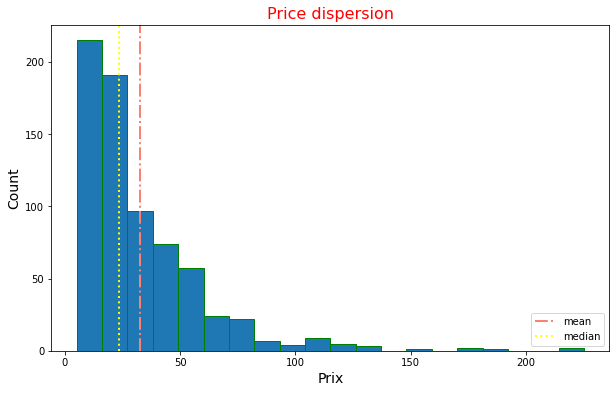

In [91]:
# Visualisation la dispersion des prix avec l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(df_price.price, bins=20, edgecolor='green')
plt.xlabel('Prix',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.title('Price dispersion',fontsize = 16, color = 'red')
plt.axvline(df_price.price.mean(), color='salmon',linestyle='dashdot', linewidth=2, label='mean')
plt.axvline(df_price.price.median(), color='yellow',linestyle='dotted', linewidth=2, label='median')
plt.legend(loc='lower right');

Text(0, 0.5, 'price')

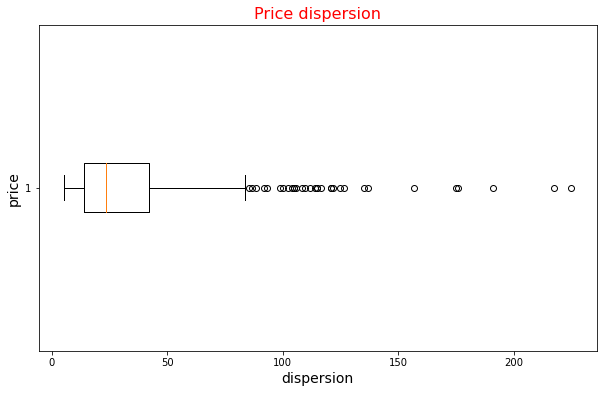

In [92]:
# Visualisation de la dispersion des prix avec la boîte à moustaches
plt.figure(figsize=(10, 6))
plt.boxplot(df_price.price, vert = False)
plt.title('Price dispersion',fontsize = 16, color = 'red')
plt.xlabel('dispersion', fontsize = 14)
plt.ylabel('price',fontsize = 14)

**2.4.3) Chercher les outliers (aberrantes) avec la méthode IQR**  
Les valeurs au-dessous de Q1−1.5IQ ou au-dessus de Q3+1.5IQ sont considérées comme des outliers.

In [93]:
# Calcul les deux quartiles Q1, Q2 et Q3
Q1 = df_price['price'].quantile(0.25)
Q2 = df_price['price'].quantile(0.5) # Médiane
Q3 = round((df_price['price'].quantile(0.75)),2)
print('Q1 = ', Q1 )
print('Q2 = ', Q2 )
print('Q3 = ', Q3)

Q1 =  14.1
Q2 =  23.55
Q3 =  42.18


In [94]:
# Calcul de l'écart interquartile IQ
IQ = Q3 - Q1
print('IQ = ', IQ)

IQ =  28.08


In [95]:
# Trouver les seuils des valeurs pour les outliers
seuil_min = Q1 - (1.5*IQ)
seuil_max =  Q3 + (1.5*IQ)
print('seuil_min = ', seuil_min )
print('seuil_max = ', seuil_max)

seuil_min =  -28.019999999999996
seuil_max =  84.3


In [96]:
# Chercher les outliers au-dessus de 'seuil_max'
df_min = df_price.loc[df_price['price'] < seuil_min]
df_min

,id_web,product_id,post_name,total_sales,price


In [97]:
# Chercher les outliers au-dessous de 'seuil_min'
df_out = df_price.loc[df_price['price'] > seuil_max]
df_out

,id_web,product_id,post_name,total_sales,price
206,13853,4359,champagne-larmandier-bernier-grand-cru-vieille...,1.0,85.6
438,13913,5026,champagne-agrapart-fils-mineral-extra-brut-bla...,0.0,86.8
66,11668,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0,88.4
502,19822,5565,tempier-bandol-cabassaou-2017,0.0,92.0
602,14774,5916,wemyss-malts-single-cask-chocolate-moka-cake,0.0,93.0
655,11601,6214,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0,99.0
64,15382,4115,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0,100.0
381,14805,4903,domaine-des-croix-corton-grand-cru-les-greves-...,0.0,102.3
223,3509,4407,cognac-frapin-cigar-blend,1.0,104.0
431,12791,5007,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0,105.0


**Résultat:**

In [98]:
 print("Avec la methode IQR, on trouve ", len(df_out), "valeurs outliers pour la variable prix.")

Avec la methode IQR, on trouve  32 valeurs outliers pour la variable prix.


**2.4.4) Chercher les outliers avec la methode Z-score**   
- 95% des points de données se situent entre +/-2 écarts types (threshold = 2)
- 99.7% des points de données se situent entre +/-3 écarts types
- Ici, si le score Z d’un point de données est supérieur à 2 ou inférieur à -2 est considéré comme les outliers.  
- Z-score = (Observation - Mean)/Std.deviation

In [99]:
df_zscore = df_price.copy()

In [100]:
df_zscore['z_score'] =(df_zscore.price - df_zscore.price.mean())/df_zscore.price.std()

In [101]:
df_zscore.head()

,id_web,product_id,post_name,total_sales,price,z_score
645,14570,6129,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,0.0,5.2,-0.981396
98,16210,4172,maurel-pays-oc-chardonnay-2019,43.0,5.7,-0.963417
99,16211,4173,maurel-pays-doc-chenin-colombard-2019,13.0,5.7,-0.963417
560,14338,5777,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0,5.7,-0.963417
100,16209,4174,maurel-cabardes-tradition-2017,6.0,5.7,-0.963417


In [102]:
# Avec threshold=2
outlier_2 = df_zscore.loc[df_zscore.z_score.abs()>2]

In [103]:
outlier_2

,id_web,product_id,post_name,total_sales,price,z_score
66,11668,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0,88.4,2.010277
502,19822,5565,tempier-bandol-cabassaou-2017,0.0,92.0,2.139725
602,14774,5916,wemyss-malts-single-cask-chocolate-moka-cake,0.0,93.0,2.175682
655,11601,6214,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0,99.0,2.391428
64,15382,4115,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0,100.0,2.427385
381,14805,4903,domaine-des-croix-corton-grand-cru-les-greves-...,0.0,102.3,2.510088
223,3509,4407,cognac-frapin-cigar-blend,1.0,104.0,2.571216
431,12791,5007,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0,105.0,2.607173
432,11602,5008,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0,105.0,2.607173
647,14596,6201,david-duband-chambolle-musigny-1er-cru-les-sen...,0.0,105.6,2.628748


In [104]:
# Avec threshold=3
outlier_3 = df_zscore.loc[df_zscore.z_score.abs()>3]

In [105]:
outlier_3 

,id_web,product_id,post_name,total_sales,price,z_score
648,15126,6202,domaine-clerget-echezeaux-en-orveaux-2015,0.0,116.4,3.017090
657,15070,6216,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0,121.0,3.182495
654,15072,6213,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0,121.0,3.182495
603,14775,5917,wemyss-malts-single-cask-scotch-whisky-choc-n-...,0.0,122.0,3.218453
511,14915,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0,124.8,3.319134
202,12589,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,11.0,126.5,3.380262
642,14923,6126,champagne-gosset-celebris-vintage-2007,2.0,135.0,3.685902
382,14220,4904,domaine-des-croix-corton-charlemagne-grand-cru...,5.0,137.0,3.757817
222,7819,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,157.0,4.476969
553,15185,5767,camille-giroud-clos-de-vougeot-2016,0.0,175.0,5.124206


**Résultat:**

In [106]:
print("Avec la methode Z-score,threshold = 2, on trouve ", len(outlier_2), "valeurs outliers pour la variable prix.")
print("Avec la methode Z-score,threshold = 3, on trouve ", len(outlier_3), "valeurs outliers pour la variable prix.")

Avec la methode Z-score,threshold = 2, on trouve  30 valeurs outliers pour la variable prix.
Avec la methode Z-score,threshold = 3, on trouve  14 valeurs outliers pour la variable prix.


**2.4.5) Visualisation à l'aide de graphiques ' nuage de points'**  
 Utilisé pour observer la relation entre le prix et la quantité vendue de chaque produit.  
 On observe que même avec des prix beaucoup plus élevés, certain produits se vendent.

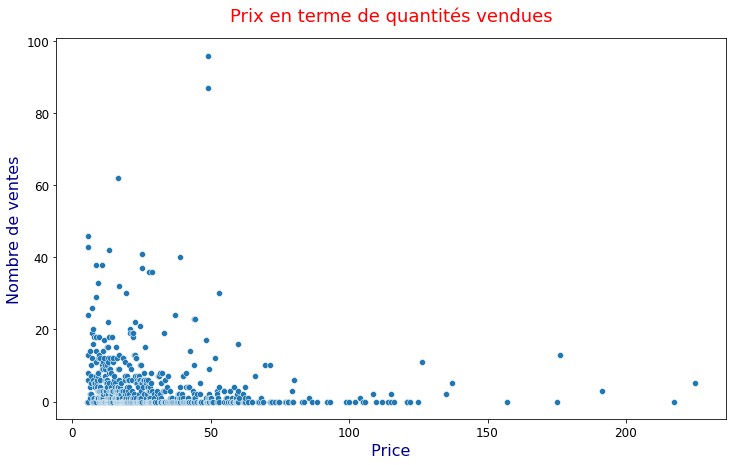

In [107]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='price', y = 'total_sales', data = df_price)
plt.xlabel(" Price ", fontsize = 16, color = 'darkblue')
plt.ylabel("Nombre de ventes", fontsize = 16, color = 'darkblue')
plt.title("Prix en terme de quantités vendues", fontsize = 18, color = 'red', y =1.03)
plt.tick_params(axis = "both", labelsize=12)

**Conclusion:**  
Dans notre base de données, nous identifions:
- 32 valeurs outliers avec la méthode IQR (basée sur la médiane)
- 30 valeurs outliers avec la méthode Z-score (basée sur la moyenne) avec un intervalle de confiance de 2 écarts type.
- 14 valeurs outliers avec la méthode Z-score (basée sur la moyenne) avec un intervalle de confiance de 3 écarts type.   

On remarque donc que c'est la valeur à 2 écarts type qui se rapproche le plus du IQR.  



**Recommandation:**

**Les valeurs aberrantes, ou plutôt incohérentes ici, influencent certains paramètres statistiques, par exemple, la moyenne. Cela peut fausser la compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier.**

**Dans notre cas d'étude il est tout à fait possible qu'il y ait une grosse différence de prix entre certaines catégories de vins, avec des prix entre 5.2 et 225 euros. Pour le vérifier, il aurait fallu disposer de données relatives au prix par type de vin (Beaujolais, Bourgogne, Champagne,...) afin de pouvoir créer des box-plot différenciées.**



**2.4.5) Calcul du chiffre d’affaire total réalisé en ligne si suppression des valeurs aberrantes (Z-score, threshold=2 )** 

In [116]:
ca_out = (outlier_2['total_sales'] * outlier_2['price']).sum()

In [117]:
print(" Le total du chiffre d’affaires avec les valeurs aberrantes est: ",ca_out, "euros." )

 Le total du chiffre d’affaires avec les valeurs aberrantes est:  6884.4 euros.


In [118]:
ca_apres = round((ca_total - ca_out),2)

In [119]:
print("Après suppression des valeurs aberrantes, le chiffre d’affaires total réalisé en ligne est de: ",ca_apres, "euros, moins 6884 euros qu'avant." )

Après suppression des valeurs aberrantes, le chiffre d’affaires total réalisé en ligne est de:  63684.2 euros, moins 6884 euros qu'avant.


**Conclusion:**  
Les valeurs aberrantes affectent bien le chiffre d’affaire total; en supprimant les 30 valeurs aberrantes (sur 714 données au total) nous perdons quasiment 10% du chiffre d’affaire total.